Fire up GraphLab Create

In [2]:
import graphlab

In [4]:
sf = graphlab.SFrame.read_csv('Philadelphia_Crime_Rate_noNA.csv/')

Finished parsing file E:\Projects\Machine Learning\Machine Learning Regression\Python Notebooks\Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.050707 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file E:\Projects\Machine Learning\Machine Learning Regression\Python Notebooks\Philadelphia_Crime_Rate_noNA.csv

Parsing completed. Parsed 99 lines in 0.041524 secs.

In [5]:
sf

HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
124186,12.4186,19.5,25.0,8.0,Aston,Delaware
110490,11.049,49.4,25.0,2.7,Bensalem,Bucks
79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks


Exploring the Data

In [8]:
graphlab.canvas.set_target('ipynb')
sf.show(view = 'Summary')

Fit the Regression Model using Crime as the feature

In [9]:
crime_model = graphlab.linear_regression.create(sf,target='HousePrice',features=['CrimeRate'],validation_set=None, verbose=False)

Let's see what our fit looks like

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

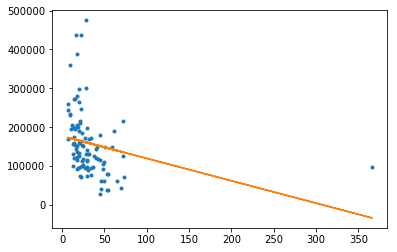

In [12]:
plt.plot(sf['CrimeRate'],sf['HousePrice'],'.',
        sf['CrimeRate'],crime_model.predict(sf),'-')

Remove Center City and Redo the Analysis

In [15]:
sf_noCC = sf[sf['MilesPhila']!=0.0]
sf_noCC.show(view='Scatter Plot', x='CrimeRate', y='HousePrice')

Refit our simple regression model on this modified dataset

In [18]:
crime_model_noCC = graphlab.linear_regression.create(sf_noCC, target='HousePrice', features=['CrimeRate'], validation_set=None, verbose=False)

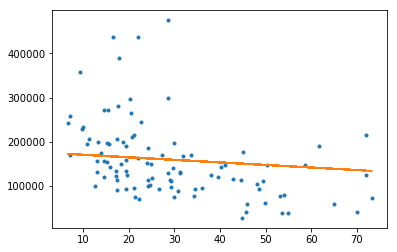

In [19]:
plt.plot(sf_noCC['CrimeRate'], sf_noCC['HousePrice'],'.',
        sf_noCC['CrimeRate'],crime_model.predict(sf_noCC),'-')

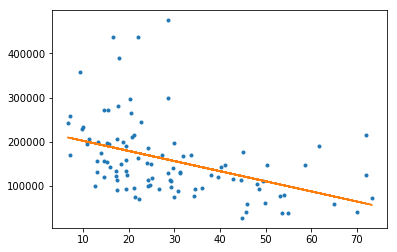

In [20]:
plt.plot(sf_noCC['CrimeRate'], sf_noCC['HousePrice'],'.',
        sf_noCC['CrimeRate'],crime_model_noCC.predict(sf_noCC),'-')

Compare coefficients for full data fit versus no Centert City fit

In [27]:
crime_model.get('coefficients')

name,index,value,stderr
(intercept),None,176626.046881,11245.5882194
CrimeRate,None,-576.804949058,226.90225951


In [28]:
crime_model_noCC.get('coefficients')

name,index,value,stderr
(intercept),None,225204.604303,16404.0247514
CrimeRate,None,-2287.69717443,491.537478123


Remove high-value outlier neightbourhoods and redo analysis

In [29]:
sf_nohighend =sf_noCC[sf_noCC['HousePrice']<350000]
crime_model_nohighend = graphlab.linear_regression.create(sf,target='HousePrice',
                                                         features=['CrimeRate'],validation_set=None,verbose=False)

In [30]:
crime_model_nohighend.get('coefficients')

name,index,value,stderr
(intercept),None,176626.046881,11245.5882194
CrimeRate,None,-576.804949058,226.90225951


In [31]:
crime_model_noCC.get('coefficients')

name,index,value,stderr
(intercept),None,225204.604303,16404.0247514
CrimeRate,None,-2287.69717443,491.537478123
